In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
from selenium import webdriver
from bs4 import BeautifulSoup as Soup
from urllib.request import urlopen as u_req
from urllib import error
import urllib
import requests
from IPython.core.debugger import set_trace
from permile import get_soup
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.style
import matplotlib as mpl
%matplotlib inline
from milemod import CustomDataFrame, CustomSeries, nearest_neighbors
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import line_profiler

In [16]:
def mileage_price(df_):
#     Calculate the price per mile for each make/model/year
#   input: dataframe of a particular make/model/year. Use w/ groupby
    c, r, _, _, _  = np.polyfit(df_.Mileage,df_.Price,1,full=True)
    r = np.sqrt(r/len(df_.Mileage))
    return c, r

In [17]:
def all_cars_to_grouped_with_regression_stats(df_):
    # Assign dollars per mile and residual to a dataframe
#     Outputs: grouped dataframe with state
    g_mileage = df_.groupby(['make','model','year'])
    temp = g_mileage.apply(mileage_price)
    coeffs,r = zip(*temp.values)
    r = (np.apply_along_axis(lambda x: x[0],1,r))
    dollars_per_mile,intercept = zip(*coeffs)

    df_g = df_.groupby(['make','model','year']).Price.agg('count').to_frame(name='count')
    df_g.loc[:,'dollars_per_mile'] = -1*np.asarray(dollars_per_mile)
    df_g.loc[:,'price_mile_resid'] = r
    return df_g

In [19]:
def plotproblem(badidx,fix=False):
    badmake = badcars.make.iloc[badidx]
    badmodel = badcars.model.iloc[badidx]
    badyear = badcars.year.iloc[badidx]
    explore = dfu.loc[(dfu.make==badmake)&(dfu.model==badmodel)&(dfu.year==badyear)]
    plt.scatter(explore.Mileage/1000,explore.Price)
    plt.gca().set_title(badmake + ' ' + badmodel + ' ' + str(badyear))
    
    if fix:
        pass
#         mad = 
    return plt.gca()

In [211]:
with open('/Users/ahakso/Documents/gitDir/permileFlask/mysite/static/combined_frame.pkl','rb') as f:
    dfc = pickle.load(f)
with open('/Users/ahakso/Documents/gitDir/permileFlask/mysite/static/car_data.pkl','rb') as f:
    _, _, dfg = pickle.load(f)            
with open('/Users/ahakso/odrive/agl/perMileCost/used_cars.pkl','rb') as f:
    dfu = pickle.load(f)    

In [212]:
dfg.price_mile_resid.mean()

2897.6258761759182

In [189]:
dfg2 = all_cars_to_grouped_with_regression_stats(dfu_new)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'make' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'model' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: 'make' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
/anaconda/envs/insight/lib/

2542.336229252413

In [192]:
dfg2.shape

(2624, 3)

In [30]:
dfg = dfg.reset_index()

negidx = (dfg.dollars_per_mile<0)

badcars = dfg.loc[negidx,['make','model','year','count']]


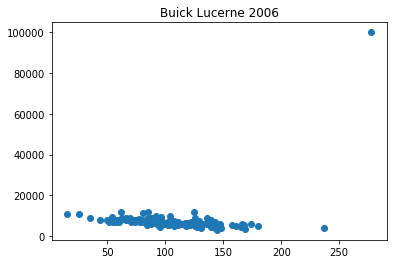

In [114]:
ax = plotproblem(1)
# ax.set_xlim(0,40)

In [80]:
np.std(explore.Mileage)

11721.875090284559

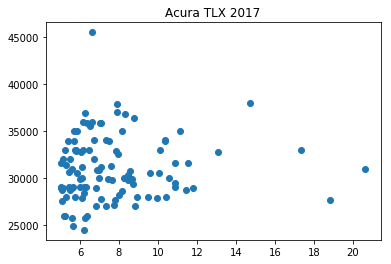

In [87]:
plotproblem(0)

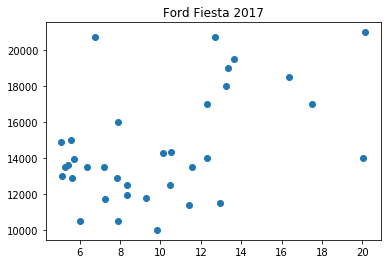

In [88]:
plotproblem(9)

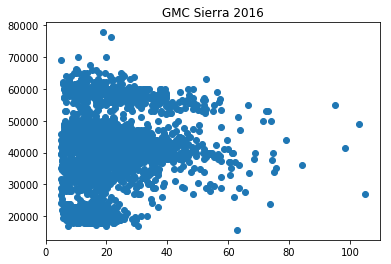

In [97]:
ax = plotproblem(13)